# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_final_salary_19-20')
qbs.head()

,NAME,final_rank,salary
0,Patrick Mahomes,2.0,4106447
1,Jared Goff,4.5,33500000
2,Matt Ryan,6.0,30000000
3,Drew Brees,7.0,25000000
4,Jimmy Garoppolo,8.0,27500000


In [3]:
X = qbs['final_rank']
y = qbs['salary']

In [4]:
qbs['Mean_Yhat'] = qbs['salary'].mean()

In [5]:
 def MSE(y_true, y_pred):
    squared_error = 0
    for i in range(len(y_true)):
        squared_error += (y_true[i] - y_pred[i]) ** 2
    return squared_error / len(y_true)

In [6]:
MSE(y, qbs['Mean_Yhat'])

142895539488485.7

In [7]:
np.sqrt(MSE(y, qbs['Mean_Yhat']))

11953892.23175806

In [8]:
def line_of_best_fit(x, y):

    y_bar = y.mean()
    x_bar = x.mean()
    std_y = y.std()
    std_x = x.std()
    r_xy = np.corrcoef(x, y)[0][1]

    beta_1 = r_xy * std_y / std_x
    beta_0 = y_bar - beta_1 * x_bar

    return beta_1 * x + beta_0

In [9]:
qbs['Linear_Yhat'] = line_of_best_fit(X, y)

In [10]:
qbs.head()

,NAME,final_rank,salary,Mean_Yhat,Linear_Yhat
0,Patrick Mahomes,2.0,4106447,13771697.0,2.279664e+07
1,Jared Goff,4.5,33500000,13771697.0,2.190240e+07
2,Matt Ryan,6.0,30000000,13771697.0,2.136586e+07
3,Drew Brees,7.0,25000000,13771697.0,2.100816e+07
4,Jimmy Garoppolo,8.0,27500000,13771697.0,2.065047e+07


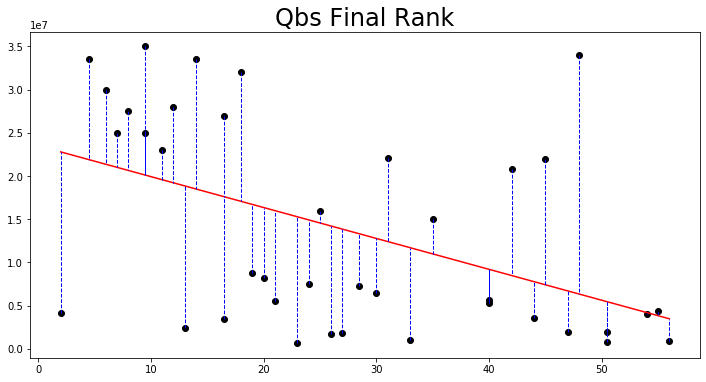

In [22]:
plt.figure(figsize=(12,6))

plt.scatter(X,
            y,
            color = 'black')

plt.plot(X,
         qbs['Linear_Yhat'],
         color = 'red')

for i, row in qbs.iterrows():
    plt.plot((row['final_rank'], row['final_rank']),
             (row['salary'], row['Linear_Yhat']),
             color = 'blue',
             linestyle = '--',
             lw=1)
    plt.title('Qbs Final Rank', fontsize = 24);

In [23]:
model = LinearRegression()

In [24]:
X = qbs[['final_rank']]
y = qbs['salary']

In [25]:
X.shape

(39, 1)

In [26]:
y.shape

(39,)

In [27]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred = model.predict(X)

In [29]:
np.sqrt(MSE(y, y_pred))

10512166.88613441

In [30]:
model.intercept_

23512035.546607666

In [31]:
model.coef_

array([-357696.04832175])

In [32]:
r2_score(y, y_pred)

0.22666828483582468